## Sparcity reduction of relative error series histogram  with outliers

<h4>
    This analisys aims to study wethers the sparcity histogram reductions algorithms can help reducing the payload of datasets with outliers.
</h4>

<h4> By now,  this is just a proof of concept about possible optimizations to matplotlib histogram generated data. We are interested in optimize cpu time and chunk data size. At the end, two new dynamic arrays are created containing  only the elements with non sparce data( different from 0). 
</h4>
<h4>
    The proposed histogram is intended to represent how the relative /percentual values of the  error  are spread through some time series. Sometimes the dataset contains error values way beyond 100% , this errors, outliers, tails the distribution. We could generate the error histogram using fixed bins independent of the dataset size and quality, 
or we could create a range of values, determining the min bucket of each series. Both approches were tested.
</h4>
<h4>  
    Using the second approch(same bin size w/ any dataset), we constrained at least 20 bins (100%) to represent the relative error, and  used a fixed bin size of  5. The major problem with this approach is that any outliler, which is a very distant points from the 100% region can create lot of useless data(zeros). To solve it, we generated a new data structure without sparcity to help data transportation. Sparce matrixes can heavily load devices memory and they add no relevant information. 
<h4>
    By the end, one should be able to render the same chart using less data points.
</h4>

### Data used

In [1]:
# mock histogram
frequency_data_y  = [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
histogram_bins_x  = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

print('\nFirst population')
#print(frequency_data_y);print(histogram_bins_x);
print('len(frequency_data): ', len(frequency_data_y))
print('len(histogram_bins): ', len(histogram_bins_x))


# testign with real data generated using matplotlib from a meter source
a = [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
b = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000, 1005, 1010, 1015, 1020, 1025, 1030, 1035, 1040, 1045, 1050, 1055, 1060, 1065, 1070, 1075, 1080, 1085, 1090, 1095, 1100, 1105, 1110, 1115, 1120, 1125, 1130, 1135, 1140, 1145, 1150, 1155, 1160, 1165, 1170, 1175, 1180, 1185, 1190, 1195, 1200, 1205, 1210, 1215, 1220, 1225, 1230, 1235, 1240, 1245, 1250, 1255, 1260, 1265, 1270, 1275, 1280, 1285, 1290, 1295, 1300, 1305, 1310, 1315, 1320, 1325, 1330, 1335, 1340, 1345, 1350, 1355, 1360, 1365, 1370, 1375, 1380, 1385, 1390, 1395, 1400, 1405, 1410, 1415, 1420, 1425, 1430, 1435, 1440, 1445, 1450, 1455, 1460, 1465, 1470, 1475, 1480, 1485, 1490, 1495, 1500, 1505, 1510, 1515, 1520, 1525, 1530, 1535, 1540, 1545, 1550, 1555, 1560, 1565, 1570, 1575, 1580, 1585, 1590, 1595, 1600, 1605, 1610, 1615, 1620, 1625, 1630, 1635, 1640, 1645, 1650, 1655, 1660, 1665, 1670, 1675, 1680, 1685, 1690, 1695, 1700, 1705, 1710, 1715, 1720, 1725, 1730, 1735, 1740, 1745, 1750, 1755, 1760, 1765, 1770, 1775, 1780, 1785, 1790, 1795, 1800, 1805, 1810, 1815, 1820, 1825, 1830, 1835, 1840, 1845, 1850, 1855, 1860, 1865, 1870, 1875, 1880, 1885, 1890, 1895, 1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950, 1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020]

print('\nSecond population')
#print(a);#print(b)
print('len(frequency_data): ', len(a))
print('len(histogram_bins): ', len(b))



First population
len(frequency_data):  23
len(histogram_bins):  23

Second population
len(frequency_data):  405
len(histogram_bins):  405


### Creating the algorthms

In [2]:
def remove_no_signal_data(bins_list_x, frequency_list):
    only_signal_collection = []
    print('index', '', 'bin_value', '', 'frequency_value')
    for index, value in enumerate(bins_list_x):
        if frequency_list[index] > 0:
            print(index, '    ', value, '           ' ,frequency_list[index] )

In [3]:
remove_no_signal_data(histogram_bins_x, frequency_data_y)

index  bin_value  frequency_value
1      5             1
2      10             2
22      110             1


In [4]:
remove_no_signal_data(b, a)

index  bin_value  frequency_value
3      15             1.0
4      20             1.0
11      55             1.0
324      1620             1.0


### Keep the first 20 bins (100% of the relative error)

In [5]:
# creating the algorithms

def remove_no_signal_data_keep_first_20_bins(bins_list_x, frequency_list):
    non_sparce_bin_collection = []
    non_sparce_frequency_collection = []
    
    print('index', '', 'bin_value', '', 'frequency_value')
    for index, bin_value in enumerate(bins_list_x):

        # always keep the 100% error range
        if index <= 20:
            non_sparce_bin_collection.append(bins_list_x[index])
            non_sparce_frequency_collection.append(frequency_list[index])

        else:
            if frequency_list[index] > 0:
                non_sparce_bin_collection.append(bins_list_x[index])
                non_sparce_frequency_collection.append(frequency_list[index])     

    return [non_sparce_bin_collection, non_sparce_frequency_collection]

         

##### testing on small population

In [6]:
print(histogram_bins_x)
print(frequency_data_y)

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]
[0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [7]:
result = remove_no_signal_data_keep_first_20_bins(histogram_bins_x, frequency_data_y )
print("non_sparce_frequency_collection: ", result[0])
print("non_sparce_bin_collection: ", result[1])

index  bin_value  frequency_value
non_sparce_frequency_collection:  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 110]
non_sparce_bin_collection:  [0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


##### testing on larger population

In [8]:
print(a)
print(b)

[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [9]:
result = remove_no_signal_data_keep_first_20_bins(b, a )
print("non_sparce_frequency_collection: ", result[0])
print("non_sparce_bin_collection: ", result[1])

index  bin_value  frequency_value
non_sparce_frequency_collection:  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 1620]
non_sparce_bin_collection:  [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


##### from this last test we can infer the bin value  with 1620% relative erro was probably an outlier/noise

### Visualizing the results


In [11]:
import matplotlib.pyplot as plt

In [23]:
from time import time

def plot_the_histogram(data, bins_size):
    start = time()
    plt.figure(figsize=(15,5))
    values = plt.hist(data, bins_size)

    plt.ylabel('Count')
    plt.xlabel('Bins of {}'.format(bins_size))
    plt.title(r'Histogram')
    plt.show()
    
    print("Underlying data strucutres")
    print(list(values[0]))
    print(list(values[1]))
    print('\n len data:', len(list(values[0])))
    print('\n len data:', len(list(values[1])))
    
    print('##################################################################')
    print('Chart generation  took: ', time() - start, 'seconds')
    print('##################################################################')
    
def plot_vertical_bar(x,y):
    start = time()
    plt.figure(figsize=(38,12))
    plt.bar(x,y)
    plt.ylabel('Count')
    plt.xlabel('Bins')
    plt.title(r'Histogram')
    plt.show()
    
    print("Underlying data strucutres")
    print(list(x))
    print(list(y))

    print('##################################################################')
    print('Chart generation  took: ', time() - start, 'seconds')
    print('##################################################################')
    

##### histogram with full series - different bins

[21.250099926276615, 15.558731396070618, 1624.6485747754782, 59.28552038655736]


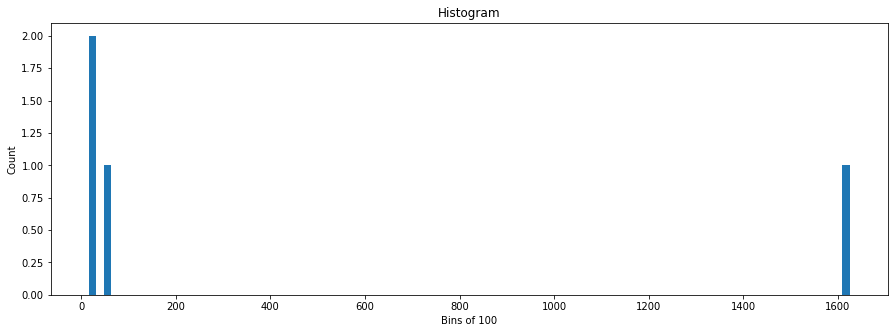

Underlying data strucutres
[2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[15.558731396070618, 31.649629829864693, 47.74052826365877, 63.83142669745284, 79.92232513124691, 96.01322356504099, 112.10412199883505, 128.19502043262912, 144.2859188664232, 160.37681730021728, 176.46771573401136, 192.55861416780542, 208.6495126015995, 224.74041103539358, 240.83130946918763, 256.9222079029817, 273.0131063367758, 289.1040047705699, 305.194903204364, 321.28580163815803, 337.37670007195214, 353.4675985057462, 369.55849693954025, 385.64939537333436, 401

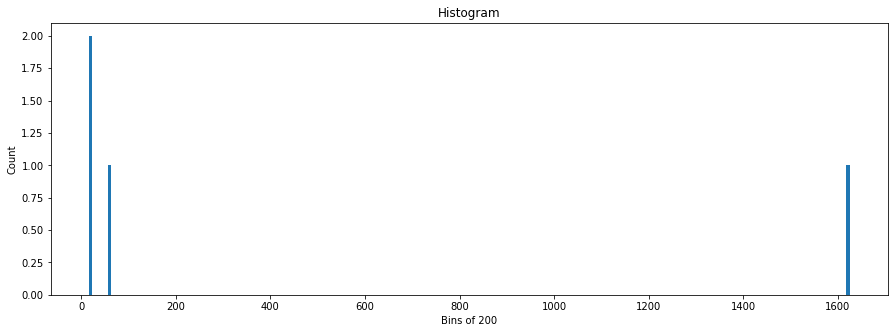

Underlying data strucutres
[2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [24]:
percentual_error0 = [0.21250099926276614, 0.1555873139607062, 16.246485747754782, 0.5928552038655736]
percentual_error = [ i*100 for i in percentual_error0]
print(percentual_error)

#plot_the_histogram(percentual_error, 5)
#plot_the_histogram(percentual_error, 10)
plot_the_histogram(percentual_error, 100) # seems the best value
plot_the_histogram(percentual_error, 200) 
#plot_the_histogram(percentual_error, 1000)
#plot_the_histogram(percentual_error, 2000)



##### histogram with range 

range(0, 2030, 5)


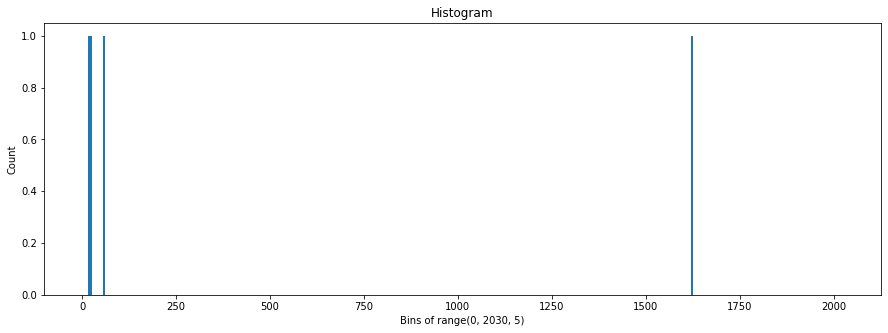

Underlying data strucutres
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [28]:
percentual_error = [0.21250099926276614, 0.1555873139607062, 16.246485747754782, 0.5928552038655736]
try:
    start = time()
    # generating the histogram RANGE - sparce matrix
    max_series = max(percentual_error) * 100  # transforming the max back into %
    hisgogram_x_max = max_series  * 1.25     # expanding the max x axis value by 25%
    bins_size = 5
    bins_range = range(0, int(hisgogram_x_max), int(bins_size))  # cast later to not truncate info
    print(bins_range)
      
    data_collection = [i*100 for i in percentual_error] # transforming the max back into %

    plot_the_histogram(data_collection, bins_range)

except Exception as e: print(str(e))

#####  histogram using the non-sparce values 

In [29]:
result = remove_no_signal_data_keep_first_20_bins(b, a )
print("non_sparce_frequency_collection: ", result[0])
print("non_sparce_bin_collection: ", result[1])

index  bin_value  frequency_value
non_sparce_frequency_collection:  [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 1620]
non_sparce_bin_collection:  [0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


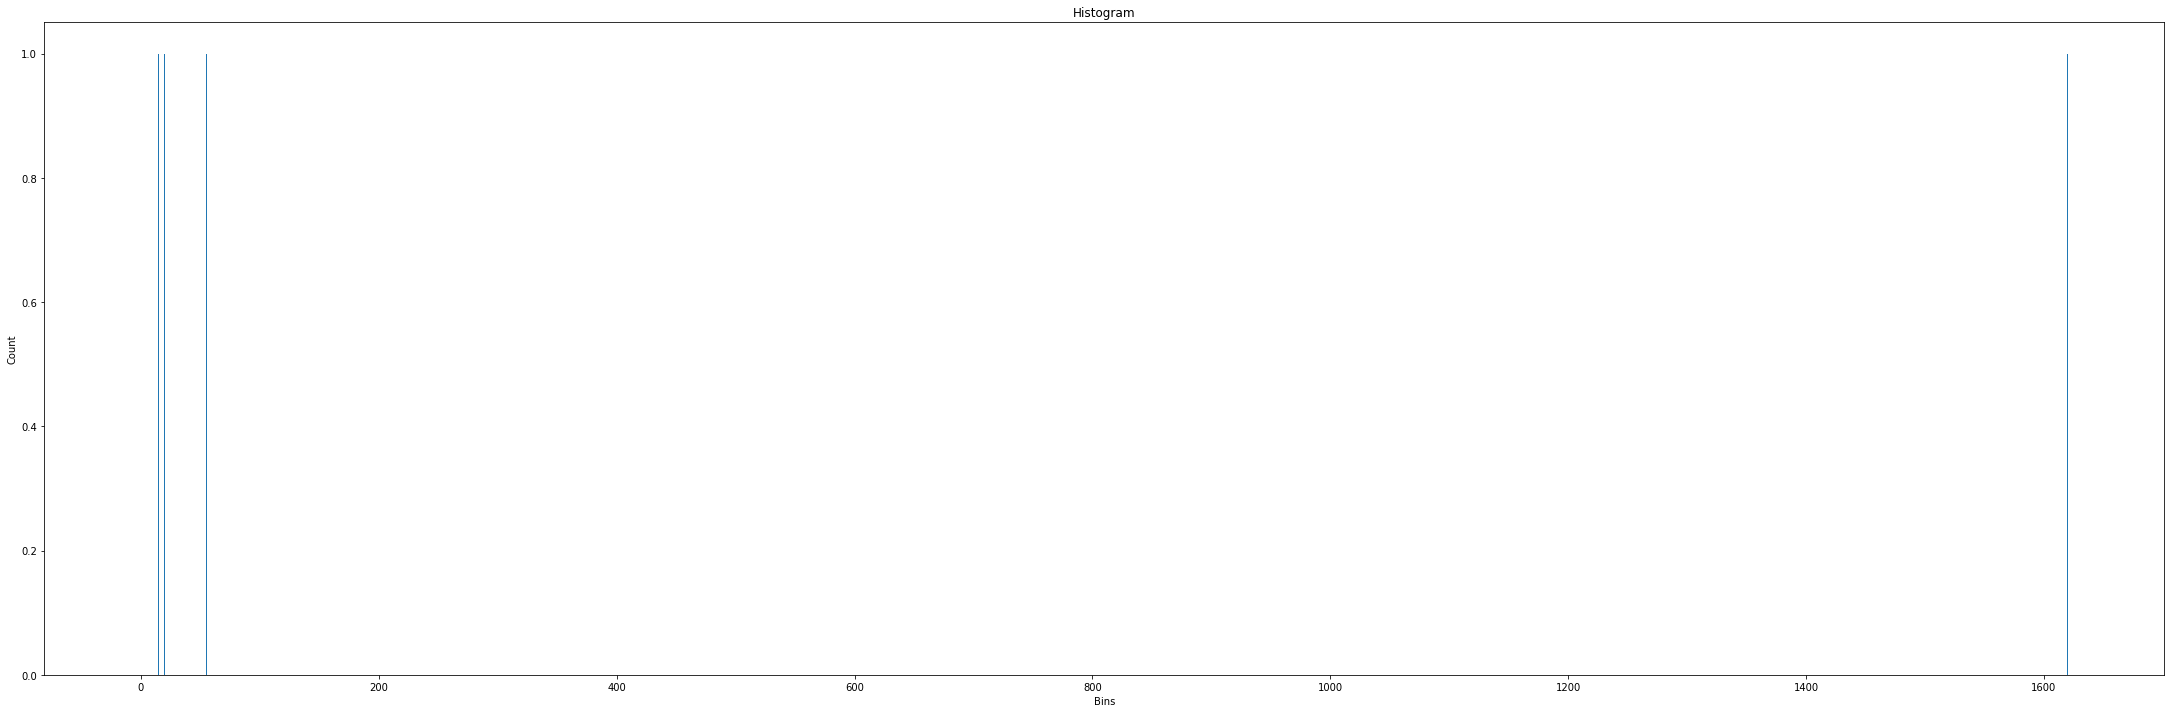

Underlying data strucutres
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 1620]
[0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
##################################################################
Chart generation  took:  1.0186498165130615 seconds
##################################################################


In [30]:
plot_vertical_bar(result[0], result[1])
#plot_vertical_bar(result[0][:14], result[1][:14]) # no outliers region

### Conclusions
#### From the former figure, using bar charts with the non-sparce dataset, we could render the same chart faster and using way less data points. On this last example, we convert 406 to 22 data points without losing information. The matplotlib bar handled the null spaces. With this approach, we dont need to save the underlaying data structure into the JSON response. Making it a more convenient option when transporting the data.

<h4>Even though a algorithm to fix sparsity was developed and tested, the computational consumption of the outliers are still a problem, since the sparce algorithms starts after the histogram calculations. 
</h4>





#### Next steps: 
<h4>
    Check if there is a way to remove sparcity before the histogram calculations
</h4>
<h4>
    Check using  javascript frontend libs for loss of information when using the original data and the sparcity algorithm result data
</h4>
